# 2. Feature Selection 特征筛选

## 使用Titanic数据集，通过特征筛选的方法一步步提升决策树的预测性能

In [2]:
import pandas as pd

# 从互联网读取titanic数据
titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')

# 分离数据特征与预测目标
y = titanic['survived']
X = titanic.drop(['row.names', 'name', 'survived'], axis=1)

# 对缺失值进行填充
X['age'].fillna(X['age'].mean(), inplace=True)
X.fillna('UNKNOWN', inplace=True)

# 分割数据，采用25%用于测试
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# 类别型特征向量化
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
X_train = vec.fit_transform(X_train.to_dict(orient='record'))
X_test = vec.transform(X_test.to_dict(orient='record'))

# 输出处理后特征向量的维度
print(len(vec.feature_names_))

D:\Program Soft\Anaconda\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


474


In [3]:
# 使用决策树模型依靠所有特征进行预测，并作性能评估
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.82370820668693012

In [6]:
# 从sklearn导入特征筛选器
from sklearn import feature_selection
# 筛选前20%的特征，使用相同配置的决策数模型进行预测，并且评估性能
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=20)

X_train_fs = fs.fit_transform(X_train, y_train)
dt.fit(X_train_fs, y_train)

X_test_fs = fs.transform(X_test)
dt.score(X_test_fs, y_test)

0.82370820668693012

In [28]:
# 通过交叉验证的方法，按照固定间隔的百分比筛选特征，并作图展示性能随特征筛选比例的变化
from sklearn.cross_validation import cross_val_score
import numpy as np

percentiles = range(1,100,1)
results = []

for i in percentiles:
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_val_score(dt, X_train_fs, y_train, cv=5)
    results = np.append(results, scores.mean())
print(results)

# 找到体现最佳性能的特征筛选的百分比
opt = np.where(results == results.max())[0]

print('Optimal number of features %d' % percentiles[int(opt)])

[ 0.85063904  0.85164914  0.85673057  0.86992373  0.87501546  0.88416821
  0.88622964  0.88725005  0.86284271  0.86693465  0.87201608  0.86997526
  0.87201608  0.86791383  0.86794475  0.87304679  0.86895485  0.86893424
  0.86590394  0.86794475  0.86487322  0.86997526  0.86692435  0.86794475
  0.87098536  0.86693465  0.86386312  0.86794475  0.861812    0.86285302
  0.86590394  0.86689342  0.86487322  0.8618223   0.86791383  0.8597918
  0.8598021   0.86487322  0.8618223   0.85982272  0.86689342  0.86283241
  0.86587302  0.86690373  0.86589363  0.86591424  0.86892393  0.86793445
  0.86589363  0.86896516  0.86490414  0.86693465  0.86487322  0.86791383
  0.86690373  0.86284271  0.87301587  0.86487322  0.87299526  0.86792414
  0.86589363  0.8638322   0.86896516  0.86284271  0.86792414  0.86692435
  0.86895485  0.86793445  0.86994434  0.86892393  0.86792414  0.86792414
  0.87198516  0.86589363  0.87097506  0.86996496  0.86486291  0.87098536
  0.87096475  0.86591424  0.87097506  0.87401567  0.

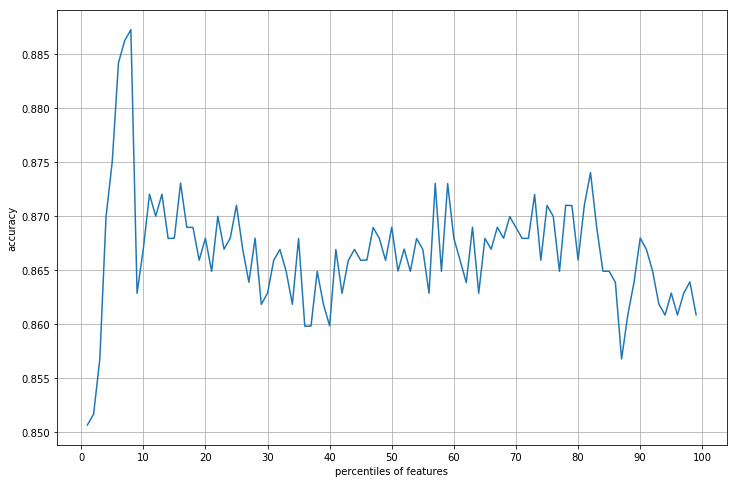

In [37]:
import pylab as pl
pl.figure(figsize=(12,8))
pl.plot(percentiles, results)
pl.xlabel('percentiles of features')
pl.xticks(range(0,101,10))
pl.ylabel('accuracy')
pl.grid()
pl.show()

In [43]:
# 使用最佳筛选后的特征，利用相同配置的模型在测试集上进行性能评估
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=8)

X_train_fs = fs.fit_transform(X_train, y_train)
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
dt.score(X_test_fs, y_test)

0.86018237082066873